In [ ]:
import pip
pip.main(['install', 'tensorflow'])

  Using cached https://files.pythonhosted.org/packages/de/f0/96fb2e0412ae9692dbf400e5b04432885f677ad6241c088ccc5fe7724d69/tensorflow-1.14.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/65/63/39d04c74222770ed1589c0eaba06c05891801219272420b40311cd60c880/wheel-0.36.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/91/2d/2ed263449a078cd9c8a9ba50ebd50123adf1f8cfbea1492f9084169b89d9/tensorboard-1.14.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c3/88/97eef84f48fa04fbd6750e62dcceafba6c63c81b7ac1420856c8dcc0a3f9/astor-0.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/79/4c/7c3275a01e12ef9368a892926ab932b33bb13d55794881e3573482b378a7/Keras_Preprocessing-1.1.2-py2.py3-none-any.whl
  Using cached https://fi

In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [10]:
df = web.DataReader('NVDA', data_source='yahoo', start='2017-01-01', end='2021-04-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,106.370003,99.379997,104.400002,102.010002,37549900.0,100.770882
2017-01-04,105.500000,101.529999,103.400002,104.389999,29980500.0,103.121964
2017-01-05,105.820000,101.050003,104.529999,101.739998,24607400.0,100.504166
2017-01-06,104.250000,101.199997,102.849998,103.099998,20571400.0,101.847641
2017-01-09,108.000000,103.500000,103.500000,107.279999,22906200.0,105.976868
...,...,...,...,...,...,...
2021-03-26,514.250000,494.940002,502.179993,513.570007,9095500.0,513.570007
2021-03-29,522.500000,508.000000,512.809998,517.929993,6838000.0,517.929993
2021-03-30,519.010010,508.200012,513.679993,514.869995,5005100.0,514.869995


In [11]:
df.shape

(1069, 6)

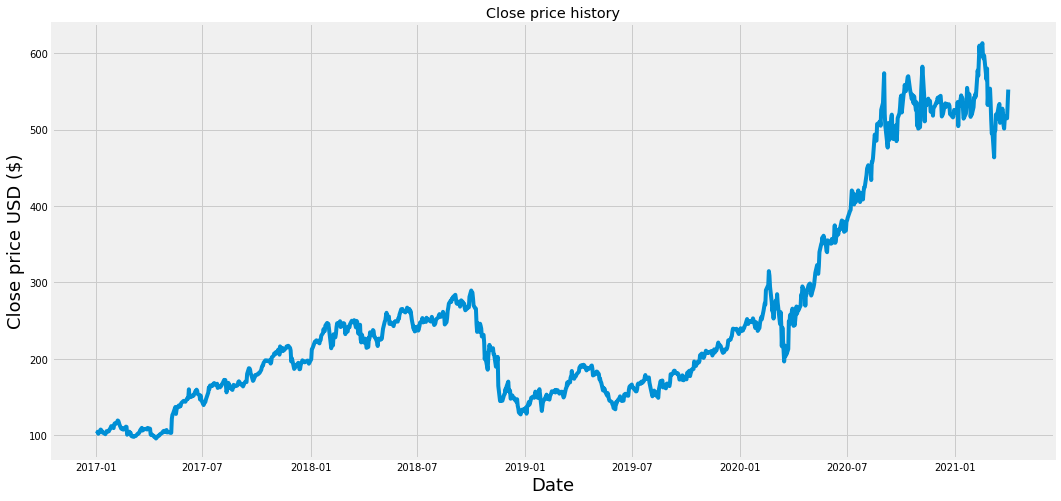

In [12]:
plt.figure(figsize=(16, 8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.show()

In [13]:
data = df.filter(['Close'])
dataset = data.values
train_data_len = math.ceil(len(dataset) * .8)

train_data_len

856

In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01259369],
       [0.01719076],
       [0.01207216],
       ...,
       [0.81005172],
       [0.84686698],
       [0.8826778 ]])

In [16]:
train_data = scaled_data[0:train_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.01259369, 0.01719076, 0.01207216, 0.01469907, 0.02277293,
       0.02120838, 0.01867806, 0.0153558 , 0.01533648, 0.01085529,
       0.01440933, 0.01867806, 0.01645678, 0.01854284, 0.02286951,
       0.02375802, 0.0273507 , 0.03144557, 0.02806536, 0.02644287,
       0.03565634, 0.03843777, 0.0364869 , 0.04214633, 0.04566174,
       0.04465735, 0.04034999, 0.03501894, 0.02489763, 0.02567025,
       0.02609519, 0.02271498, 0.02267636, 0.03009349, 0.02949471,
       0.00965773, 0.01153133, 0.0172294 , 0.01156997, 0.01410029,
       0.00677973, 0.00567875, 0.00421077, 0.00627752, 0.00592985,
       0.00589122, 0.00701152, 0.01228463, 0.01214943, 0.01363672,
       0.01607046, 0.02043576, 0.02696438, 0.02012672, 0.02429885,
       0.02240593, 0.02313993, 0.02464653, 0.02356487, 0.02288882])]
[0.026867810813482912]



In [18]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(796, 60, 1)

In [21]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
796/796 [==============================] - 33s 42ms/sample - loss: 0.0013


In [25]:
test_data = scaled_data[train_data_len - 60:, :]
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [26]:
x_test = np.array(x_test)

In [27]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [28]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [29]:
# Get RMSE
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

8.0522939476049

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


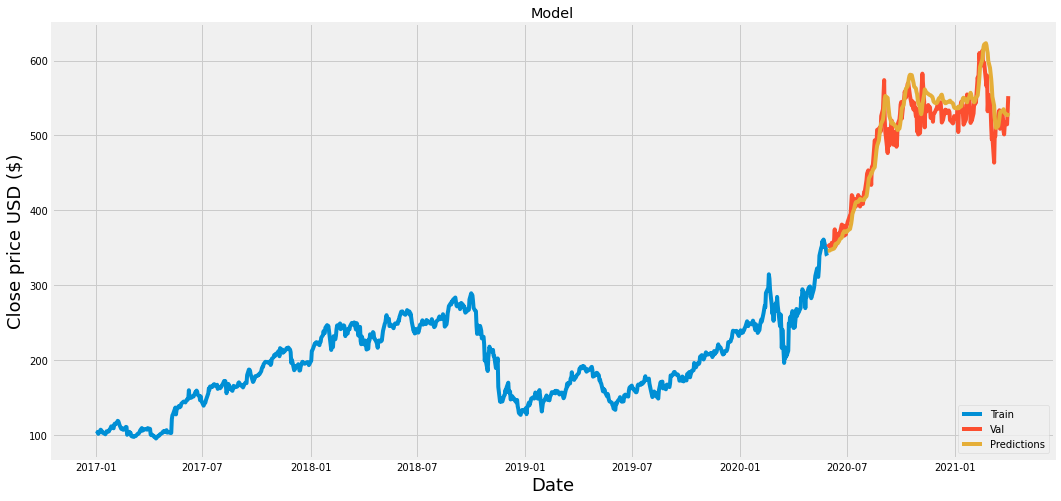

In [31]:
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [32]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-05-29,355.019989,346.155334
2020-06-01,352.250000,346.297363
2020-06-02,353.010010,346.725372
2020-06-03,350.779999,347.370667
2020-06-04,350.660004,347.732513
...,...,...
2021-03-26,513.570007,529.714600
2021-03-29,517.929993,527.704102
2021-03-30,514.869995,527.216309


In [33]:
nvidia_quote = web.DataReader('NVDA', data_source='yahoo', start='2017-01-01', end='2021-04-01')
new_df = nvidia_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[536.88074]]


In [35]:
nvidia_quote2 = web.DataReader('NVDA', data_source='yahoo', start='2021-04-02', end='2021-04-02')
print(nvidia_quote2['Close'])

Date
2021-04-01    552.469971
Name: Close, dtype: float64
